In [2]:
import os 
import re
import numpy as np
import matplotlib.pyplot as plt

In [55]:
f = open(os.path.join('/home/pouple/PhD/Data/793616_D5_16092022_woartefacts', 'digitalin.dat'), 'rb') 
sd_array = np.fromfile(f, np.int16)
f.close()

In [5]:
f = open(os.path.join('/home/pouple/PhD/Data/793616_D5_16092022', 'amplifier.dat'), 'rb') 
amp_array = np.fromfile(f, np.int16)
f.close()
amp_array = amp_array.reshape(-1, 64)
amp_array = amp_array.T

In [58]:
print(np.shape(sd_array))
a = np.where(np.insert(np.diff(sd_array), 0, 0) == -4)[0]
# For some reason there is 26 uknown pulses at the beginning of the recording
print(len(a))
a = a[26:]

(78875280,)
21626


In [59]:
# There should be 36 LED, 15 presentations, 4 intensities, 10 pulses = 21600
for stim in a:
    amp_array[:, stim+10:stim+17] = np.repeat(np.mean(amp_array[:, stim+10:stim+17]), 7)


In [62]:
with open(os.path.join('/home/pouple/PhD/Data/793616_D5_16092022', 'amplifier_new.dat'), 'wb') as f:
    np.save(f, np.array(amp_array, np.int16))
    

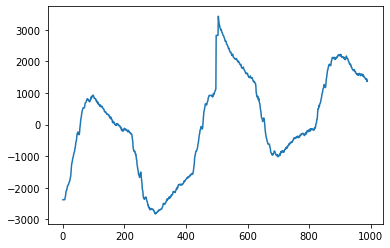

In [61]:
plt.plot(amp_array[37, a[11]+10:a[11]+1000])
plt.show()

In [ ]:
all_pres = np.array(np.mean([]) in amp_array[0])